## VAE using pytorch

### Data exploration

In [2]:
import pandas as pd
import numpy as np
import os


In [3]:
os.chdir(r"D:\Yichen_Guo\YichenG_Code\Yichen-Capstone-Project")
os.getcwd()

'D:\\Yichen_Guo\\YichenG_Code\\Yichen-Capstone-Project'

In [4]:
mRNA = pd.read_csv("Data/HCC-GU/mRNA_Enzy.csv",delimiter=";")
miRNA = pd.read_csv("Data/HCC-GU/miRNA_Enzy.csv",delimiter=";")
score_mat =  pd.read_csv("Data/HCC-GU/Score_mat_Enzy.csv",delimiter=";")
patient_labels = pd.read_csv("Data/HCC-GU/sample_labels.csv",delimiter=";") # 1 indicated patient with HCC and CIRR (39), 0 indicated patients with CIRR (25) 

In [5]:
mRNA.head()

## each row is a liver tissue that extract from the 64 patients (marked in the patient_label)

,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,AANAT,AARS,AASDHPPT,...,ZNF254,ZNF43,ZNF610,ZNF675,ZNF682,ZNF708,ZNF85,ZNF91,ZNF93,ZWILCH
T_001,-0.943365,1.071710,1.071710,0.393936,1.005661,-1.393830,-0.621972,-0.621972,-1.620037,-1.498261,...,1.005661,1.498261,1.393830,0.101446,0.827756,1.393830,0.527832,0.020259,1.218445,-0.670934
T_007,-0.773586,0.670934,0.393936,-1.218445,0.827756,-0.574326,-0.308231,0.183245,1.005661,-1.964241,...,-0.393936,0.721399,0.224533,0.142238,1.393830,0.060807,1.142291,2.269380,0.773586,0.224533
T_013,0.020259,-0.060807,-0.974085,-0.773586,-1.964241,0.943365,0.574326,-0.621972,-0.670934,-1.393830,...,0.308231,-0.101446,0.183245,-1.071710,-0.527832,0.101446,0.884222,0.142238,-0.308231,-0.621972
T_016,-0.621972,-0.350792,-0.183245,0.020259,-0.266171,0.101446,0.670934,1.142291,-1.393830,-0.308231,...,1.142291,-1.071710,-1.301604,0.183245,1.620037,0.266171,-0.574326,1.005661,0.224533,1.620037
T_020,-0.670934,-0.393936,0.266171,0.183245,-0.437756,1.071710,-0.437756,-0.621972,-0.142238,-0.884222,...,1.768555,0.527832,0.482351,0.224533,-0.020259,0.574326,0.393936,1.218445,-0.266171,0.060807


In [6]:
miRNA

## each row is a liver tissue that extract from the 64 patients (marked in the patient_label)

,hsa.let.7a.2.3p,hsa.let.7a.3p,hsa.let.7a.5p,hsa.let.7b.3p,hsa.let.7b.5p,hsa.let.7c.3p,hsa.let.7c.5p,hsa.let.7d.3p,hsa.let.7d.5p,hsa.let.7e.3p,...,hsa.miR.95.3p,hsa.miR.95.5p,hsa.miR.9500,hsa.miR.96.5p,hsa.miR.98.3p,hsa.miR.98.5p,hsa.miR.99a.3p,hsa.miR.99a.5p,hsa.miR.99b.3p,hsa.miR.99b.5p
T_001,1.973054,0.395704,-0.352366,1.400084,0.352366,0.352366,-0.439720,1.223912,0.101901,1.400084,...,-0.576903,-1.223912,-0.020350,0.724636,1.627306,-0.576903,-0.395704,-1.504984,1.147417,0.947598
T_007,-1.973054,0.352366,1.307444,0.020350,0.777057,0.309614,0.439720,0.309614,1.776490,0.831470,...,1.223912,0.309614,-1.042831,1.307444,0.724636,1.776490,0.061080,-0.888189,0.576903,0.439720
T_013,1.010173,0.184067,0.309614,0.439720,0.184067,-0.673945,-0.020350,-0.947598,-0.101901,-0.267365,...,0.061080,-0.061080,1.400084,-0.530201,0.831470,0.624763,-0.439720,-0.439720,-0.225540,-0.530201
T_016,2.279563,-2.279563,-0.225540,-0.309614,-0.395704,-0.576903,0.020350,1.147417,-0.061080,-2.279563,...,-0.624763,-0.439720,-1.042831,-0.831470,-1.223912,-0.831470,-0.888189,-1.147417,-1.504984,-1.504984
T_020,0.673945,-0.184067,-0.267365,-0.888189,-0.576903,-0.225540,-0.184067,-0.624763,-0.624763,-0.309614,...,-0.724636,0.888189,-1.042831,-0.352366,1.307444,0.831470,-0.724636,0.395704,-0.142876,0.225540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_086,0.530201,1.223912,1.627306,0.352366,1.504984,1.307444,1.504984,-0.530201,0.777057,1.223912,...,1.400084,0.267365,0.777057,-0.061080,-0.020350,0.267365,1.627306,1.776490,1.307444,1.223912
T_089,-1.307444,-0.484515,0.888189,-0.101901,1.400084,-0.020350,0.888189,0.888189,0.309614,-0.061080,...,0.888189,0.673945,-1.042831,0.184067,-0.777057,-0.184067,0.673945,0.777057,0.888189,0.777057
T_092,-1.076518,-0.309614,1.400084,1.147417,1.776490,0.724636,0.267365,0.777057,1.627306,1.973054,...,1.010173,-1.776490,-0.184067,0.309614,-0.530201,-0.624763,0.484515,1.400084,1.973054,1.973054
T_095,-0.777057,0.724636,1.973054,0.484515,1.973054,1.973054,1.627306,1.010173,1.010173,0.439720,...,1.776490,0.624763,-1.042831,0.061080,-0.673945,-0.225540,1.223912,0.831470,1.627306,1.627306


In [7]:
score_mat

## Domain knowledge
## four confiendence level for mRNA-miRNA associations, 1 for expertimentally observed links, 0.75 for highly predicted, 0.5 for moderately predicveted, and 0 for those neirther observed nor predicted

,hsa.let.7a.2.3p,hsa.let.7a.3p,hsa.let.7a.5p,hsa.let.7b.3p,hsa.let.7b.5p,hsa.let.7c.3p,hsa.let.7c.5p,hsa.let.7d.3p,hsa.let.7d.5p,hsa.let.7e.3p,...,hsa.miR.95.3p,hsa.miR.95.5p,hsa.miR.9500,hsa.miR.96.5p,hsa.miR.98.3p,hsa.miR.98.5p,hsa.miR.99a.3p,hsa.miR.99a.5p,hsa.miR.99b.3p,hsa.miR.99b.5p
A2M,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
A4GALT,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
A4GNT,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.75,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
AAAS,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
AACS,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF708,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF85,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF91,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF93,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0


## building the autoencoder

Based on the performace, the potiential of including supervised classification in to the model?
- To get a better represetntation of the original data?
- known to work for classification problems

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=0.5):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)  # Batch Normalization layer
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)  # Batch Normalization layer
        self.dropout = nn.Dropout(drop_out) 
        self.fc_mu = nn.Linear(hidden_dim2, z_dim)
        self.fc_log_var = nn.Linear(hidden_dim2, z_dim)
    
    def forward(self, x):
        h = torch.relu(self.bn1(self.fc1(x)))  # Apply Batch Normalization
        h = self.dropout(h)
        h = torch.relu(self.bn2(self.fc2(h)))  # Apply Batch Normalization
        h = self.dropout(h)
        mu = self.fc_mu(h)
        log_var = self.fc_log_var(h)
        return mu, log_var

class Decoder(nn.Module):
    def __init__(self, z_dim, hidden_dim1, hidden_dim2, output_dim, drop_out=0.5):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(z_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)  # Batch Normalization layer
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)  # Batch Normalization layer
        self.dropout = nn.Dropout(drop_out) 
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
    
    def forward(self, x):
        h = torch.relu(self.bn1(self.fc1(x)))  # Apply Batch Normalization
        h = self.dropout(h)
        h = torch.relu(self.bn2(self.fc2(h)))  # Apply Batch Normalization
        h = self.dropout(h)
        recon = self.fc3(h) # using linear due to data type, may use sigmoid if want to use this as classification method
        return recon

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out)
        self.decoder = Decoder(z_dim, hidden_dim1, hidden_dim2, input_dim, drop_out)
    
    def forward(self, x):
        mu, log_var = self.encoder(x)
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        z = mu + eps * std
        recon = self.decoder(z)
        return recon, mu, log_var

def loss_function(recon_x, x, mu, log_var):
    MSE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return MSE + KLD

## mRNA test

In [10]:
## Parameters
df_train = mRNA
input_dim = df_train.shape[1]
hidden_dim1 = 1024
hidden_dim2 = 512 
z_dim = 12 
learning_rate = 1e-3
num_epochs = 10000 
drop = 0.3

### training loop without the incorporation of the labels in the prediction

In [31]:

## Prepare and split the data
tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
train_dataset = TensorDataset(tensor_train)


train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

best_val_loss = float('inf')
patience = 500  # Number of epochs to wait for improvement before stopping
wait = 0


# Model compile

model = VAE(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
model = model.to('cuda') 

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

val_loss_values = []
train_loss_values = []
train_latents = []
val_latents = []
train_recon_errors = []
val_recon_errors = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0  # Initialize training loss
    train_recon_error = 0  # Initialize training reconstruction error
    
    # Initialize as empty lists for each epoch
    epoch_train_latents = []  
    
    for batch in train_loader:
        data, = batch
        data = data.to('cuda')
        optimizer.zero_grad()
        recon_batch, mu, log_var = model(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()  # Accumulate the training loss
        epoch_train_latents.append(mu.cpu().detach().numpy())  # Append to epoch list
        train_recon_error += F.mse_loss(recon_batch, data, reduction='mean').item()  # Accumulate training reconstruction error
    
    # Compute the mean latent variables for this epoch
    # epoch_train_latents = np.mean(np.vstack(epoch_train_latents), axis=0)
    # train_latents.append(epoch_train_latents)
    train_latents.extend(epoch_train_latents) 
    
    train_loss /= len(train_loader.dataset)  # Compute the average training loss
    train_loss_values.append(train_loss)
    train_recon_error /= len(train_loader)  # Compute the average training reconstruction error
    train_recon_errors.append(train_recon_error)

    model.eval()
    val_loss = 0
    val_recon_error = 0  # Initialize validation reconstruction error
    
    # Initialize as empty lists for each epoch
    epoch_val_latents = []  
    
    with torch.no_grad():
        for batch in val_loader:
            data, = batch
            data = data.to('cuda')
            recon_batch, mu, log_var = model(data)
            val_loss += loss_function(recon_batch, data, mu, log_var).item()
            epoch_val_latents.append(mu.cpu().detach().numpy())  # Append to epoch list
            val_recon_error += F.mse_loss(recon_batch, data, reduction='mean').item()  # Accumulate validation reconstruction error

    # Compute the mean latent variables for this epoch
    # epoch_val_latents = np.mean(np.vstack(epoch_val_latents), axis=0)
    # val_latents.append(epoch_val_latents)
    val_latents.extend(epoch_val_latents)

    val_loss /= len(val_loader.dataset)
    val_loss_values.append(val_loss)
    val_recon_error /= len(val_loader)  # Compute the average validation reconstruction error
    val_recon_errors.append(val_recon_error)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    
    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0  # Reset wait counter
    else:
        wait += 1
        if wait >= patience:
            print('Early stopping')
            break

Epoch 1/10000, Train Loss: 2209.1927, Validation Loss: 1814.6531
Epoch 2/10000, Train Loss: 2058.4698, Validation Loss: 1832.5715
Epoch 3/10000, Train Loss: 1942.8121, Validation Loss: 2008.4546
Epoch 4/10000, Train Loss: 1809.5577, Validation Loss: 1896.2422
Epoch 5/10000, Train Loss: 1704.2777, Validation Loss: 1784.3093
Epoch 6/10000, Train Loss: 1616.8128, Validation Loss: 1760.4261
Epoch 7/10000, Train Loss: 1568.3588, Validation Loss: 1693.6116
Epoch 8/10000, Train Loss: 1477.8201, Validation Loss: 1664.8963
Epoch 9/10000, Train Loss: 1427.5420, Validation Loss: 1610.5397
Epoch 10/10000, Train Loss: 1395.7528, Validation Loss: 1624.8860
Epoch 11/10000, Train Loss: 1369.5518, Validation Loss: 1596.0508
Epoch 12/10000, Train Loss: 1339.1499, Validation Loss: 1591.6212
Epoch 13/10000, Train Loss: 1330.5131, Validation Loss: 1577.8012
Epoch 14/10000, Train Loss: 1284.6105, Validation Loss: 1589.6025
Epoch 15/10000, Train Loss: 1284.1370, Validation Loss: 1590.6289
Epoch 16/10000, Tra

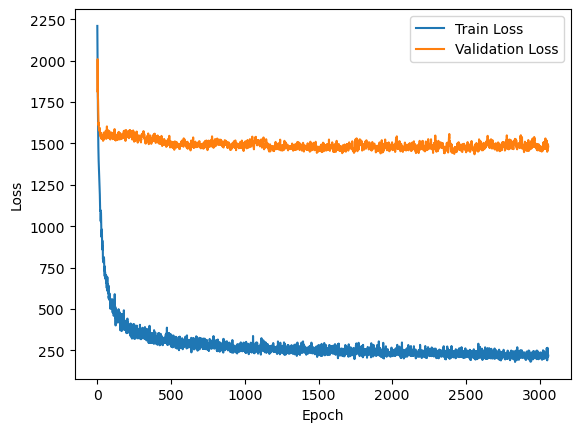

In [32]:
plt.plot(train_loss_values, label='Train Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [33]:
train_latents_stacked = np.vstack(train_latents) 
val_latents_stacked = np.vstack(val_latents) 

print("The shape of train_latent_stacked array is", train_latents_stacked.shape)
print("The shape of val_latent_stacked array is", val_latents_stacked.shape)

The shape of train_latent_stacked array is (156009, 10)
The shape of val_latent_stacked array is (39767, 10)


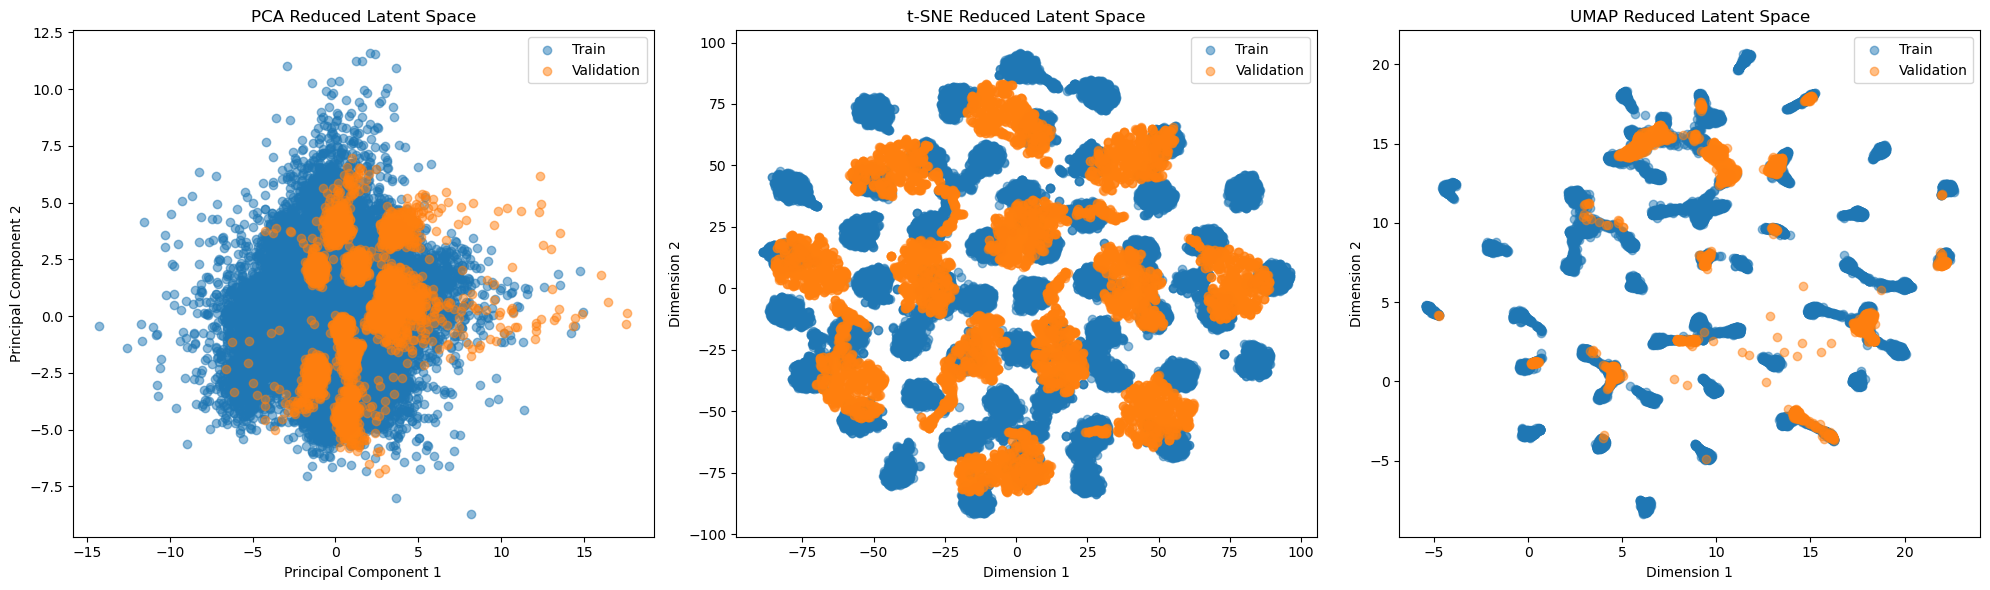

In [12]:

# Create a figure to hold the subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_latents_stacked)
val_pca = pca.transform(val_latents_stacked)
axs[0].scatter(train_pca[:, 0], train_pca[:, 1], label='Train', alpha=0.5)
axs[0].scatter(val_pca[:, 0], val_pca[:, 1], label='Validation', alpha=0.5)
axs[0].legend()
axs[0].set_title('PCA Reduced Latent Space')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# t-SNE
tsne = TSNE(n_components=2)
train_tsne = tsne.fit_transform(train_latents_stacked)
val_tsne = tsne.fit_transform(val_latents_stacked)
axs[1].scatter(train_tsne[:, 0], train_tsne[:, 1], label='Train', alpha=0.5)
axs[1].scatter(val_tsne[:, 0], val_tsne[:, 1], label='Validation', alpha=0.5)
axs[1].legend()
axs[1].set_title('t-SNE Reduced Latent Space')
axs[1].set_xlabel('Dimension 1')
axs[1].set_ylabel('Dimension 2')

# UMAP
reducer = umap.UMAP()
train_umap = reducer.fit_transform(train_latents_stacked)
val_umap = reducer.transform(val_latents_stacked)
axs[2].scatter(train_umap[:, 0], train_umap[:, 1], label='Train', alpha=0.5)
axs[2].scatter(val_umap[:, 0], val_umap[:, 1], label='Validation', alpha=0.5)
axs[2].legend()
axs[2].set_title('UMAP Reduced Latent Space')
axs[2].set_xlabel('Dimension 1')
axs[2].set_ylabel('Dimension 2')

# Show the plot
plt.tight_layout()
plt.show()

#### For training with label added (added only for vislualization need)

Trying to use labels for visualization and evaluation of the latent space representations after training (post hoc), then it doesn't modify the VAE model itself or add a supervised component to it. 

In [11]:
# Prepare and split the data
tensor_labels = torch.tensor(patient_labels.values, dtype=torch.float32)
tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
train_dataset = TensorDataset(tensor_train, tensor_labels)


train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

best_val_loss = float('inf')
patience = 500  # Number of epochs to wait for improvement before stopping
wait = 0

# Model compile

model = VAE(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
model = model.to('cuda') 

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

val_loss_values = []
train_loss_values = []
train_latents = []
val_latents = []
train_labels = []  # Storing labels for training set
val_labels = []  # Storing labels for validation set
train_recon_errors = []
val_recon_errors = []

# We'll now store the average data from each batch instead of individual samples.
train_data_avg_batch = []  
train_sample_recon_errors = []  # Storing average reconstruction error for each batch

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0  
    train_recon_error = 0  
    
    for batch in train_loader:
        data, labels = batch  # Now you're also getting the labels
        data = data.to('cuda')
        optimizer.zero_grad()
        recon_batch, mu, log_var = model(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        # Store the average sample from each batch
        avg_data = data.mean(0).cpu().detach().numpy()
        train_data_avg_batch.append(avg_data)
        
        train_latents.extend(mu.cpu().detach().numpy())  # Directly extending the train_latents list
        train_labels.extend(labels.cpu().detach().numpy())  # Directly extending the train_labels list
        
        # Get the average reconstruction error for the batch and store it
        train_recon_error += F.mse_loss(recon_batch, data, reduction='mean').item()  
        batch_recon_errors = F.mse_loss(recon_batch, data, reduction='none').mean(1).cpu().detach().numpy()
        avg_batch_recon_error = batch_recon_errors.mean()
        train_sample_recon_errors.append(avg_batch_recon_error)
    
    train_loss /= len(train_loader.dataset)
    train_loss_values.append(train_loss)
    train_recon_error /= len(train_loader)
    train_recon_errors.append(train_recon_error)

    model.eval()
    val_loss = 0
    val_recon_error = 0  
    
    with torch.no_grad():
        for batch in val_loader:
            data, labels = batch  # Now you're also getting the labels
            data = data.to('cuda')
            recon_batch, mu, log_var = model(data)
            val_loss += loss_function(recon_batch, data, mu, log_var).item()
            val_latents.extend(mu.cpu().detach().numpy())  # Directly extending the val_latents list
            val_labels.extend(labels.cpu().detach().numpy())  # Directly extending the val_labels list
            val_recon_error += F.mse_loss(recon_batch, data, reduction='mean').item()  
    
    val_loss /= len(val_loader.dataset)
    val_loss_values.append(val_loss)
    val_recon_error /= len(val_loader)
    val_recon_errors.append(val_recon_error)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0  # Reset wait counter
    else:
        wait += 1
        if wait >= patience:
            print('Early stopping')
            break

train_data_avg_batch = np.array(train_data_avg_batch)
train_sample_recon_errors = np.array(train_sample_recon_errors)

Epoch 1/10000, Train Loss: 3724.3667, Validation Loss: 3887.6130
Epoch 2/10000, Train Loss: 3356.8151, Validation Loss: 3733.2770
Epoch 3/10000, Train Loss: 2963.5129, Validation Loss: 3621.6427
Epoch 4/10000, Train Loss: 2644.9459, Validation Loss: 3756.5931
Epoch 5/10000, Train Loss: 2450.7191, Validation Loss: 4601.4967
Epoch 6/10000, Train Loss: 2276.8653, Validation Loss: 3598.6626
Epoch 7/10000, Train Loss: 2376.6326, Validation Loss: 3245.8260
Epoch 8/10000, Train Loss: 2231.2621, Validation Loss: 2995.5910
Epoch 9/10000, Train Loss: 2142.0014, Validation Loss: 2943.0736
Epoch 10/10000, Train Loss: 2141.9756, Validation Loss: 2957.1148
Epoch 11/10000, Train Loss: 2123.9002, Validation Loss: 2929.6310
Epoch 12/10000, Train Loss: 2055.7530, Validation Loss: 2920.2554
Epoch 13/10000, Train Loss: 1996.5721, Validation Loss: 2884.8317
Epoch 14/10000, Train Loss: 1962.0086, Validation Loss: 2887.0168
Epoch 15/10000, Train Loss: 2000.7298, Validation Loss: 2876.2446
Epoch 16/10000, Tra

In [12]:
# After the loop, if you wish to convert the lists to arrays:
train_latents = np.array(train_latents)
train_labels = np.array(train_labels)
val_latents = np.array(val_latents)
val_labels = np.array(val_labels)

print("The shape of val_latent array is", val_latents.shape)
print("The shape of val_label array is", val_labels.shape)
print("The shape of train_latents array is", train_latents.shape)
print("The shape of train label array is", train_labels.shape)

The shape of val_latent array is (7007, 12)
The shape of val_label array is (7007, 1)
The shape of train_latents array is (27489, 12)
The shape of train label array is (27489, 1)


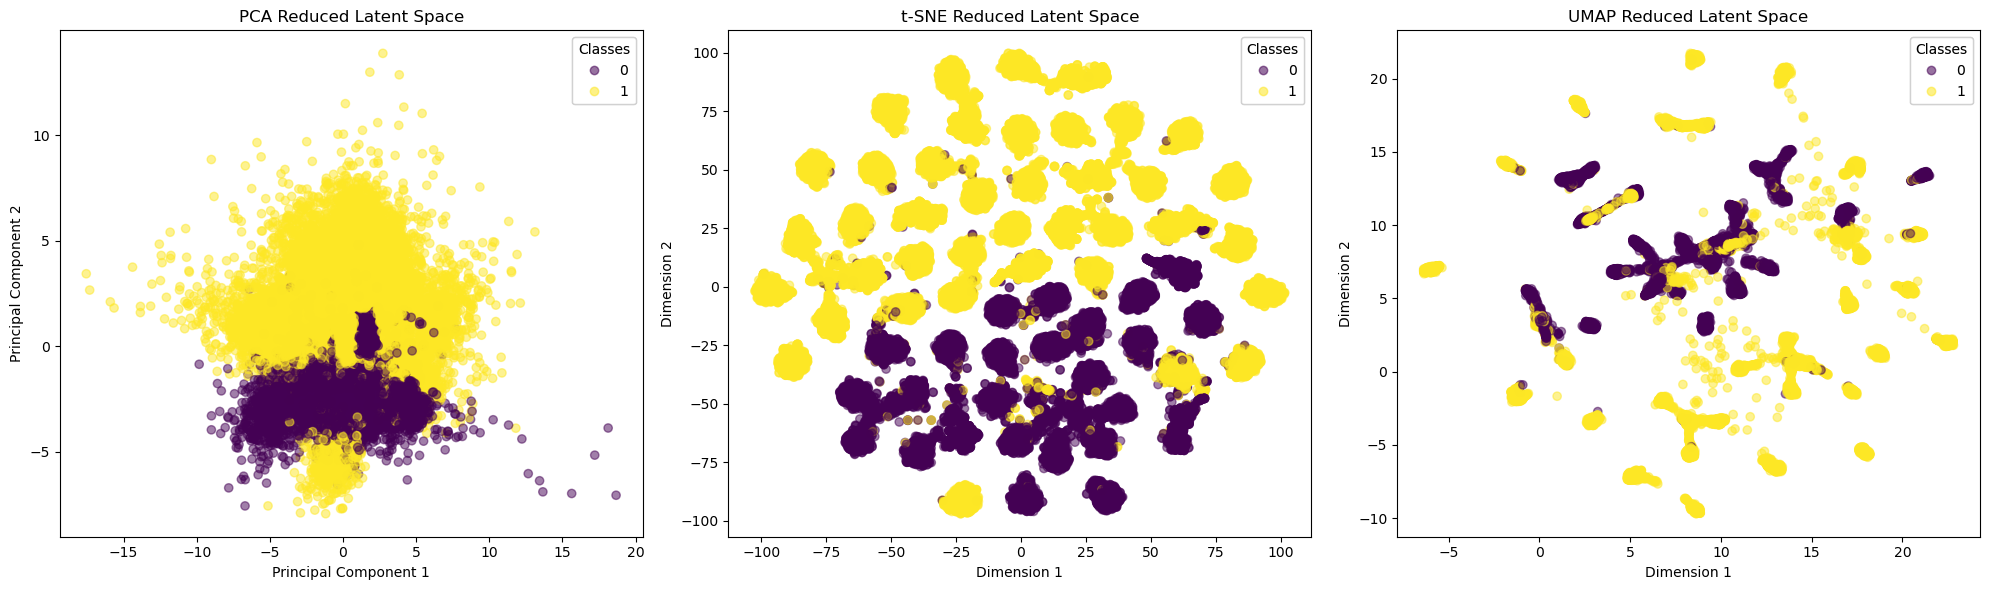

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_latents)
val_pca = pca.transform(val_latents)
scatter = axs[0].scatter(train_pca[:, 0], train_pca[:, 1], c=train_labels, alpha=0.5)
axs[0].scatter(val_pca[:, 0], val_pca[:, 1], c=val_labels, alpha=0.5)
legend1 = axs[0].legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Classes")
axs[0].add_artist(legend1)
axs[0].set_title('PCA Reduced Latent Space')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# t-SNE
tsne = TSNE(n_components=2)
all_latents = np.vstack([train_latents, val_latents])
all_labels = np.hstack([train_labels.reshape(-1), val_labels.reshape(-1)])
all_tsne = tsne.fit_transform(all_latents)
scatter = axs[1].scatter(all_tsne[:len(train_labels), 0], all_tsne[:len(train_labels), 1], c=train_labels, alpha=0.5)
axs[1].scatter(all_tsne[len(train_labels):, 0], all_tsne[len(train_labels):, 1], c=val_labels, alpha=0.5)
legend2 = axs[1].legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Classes")
axs[1].add_artist(legend2)
axs[1].set_title('t-SNE Reduced Latent Space')
axs[1].set_xlabel('Dimension 1')
axs[1].set_ylabel('Dimension 2')

# UMAP
reducer = umap.UMAP()
train_umap = reducer.fit_transform(train_latents)
val_umap = reducer.transform(val_latents)
scatter = axs[2].scatter(train_umap[:, 0], train_umap[:, 1], c=train_labels, alpha=0.5)
axs[2].scatter(val_umap[:, 0], val_umap[:, 1], c=val_labels, alpha=0.5)
legend3 = axs[2].legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Classes")
axs[2].add_artist(legend3)
axs[2].set_title('UMAP Reduced Latent Space')
axs[2].set_xlabel('Dimension 1')
axs[2].set_ylabel('Dimension 2')

# Show the plot
plt.tight_layout()
plt.show()

### Using SVM to evaluate the performance of the VAE code

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_latents2 = np.vstack(train_latents)

# Initialize the SVM classifier
clf = SVC()

# Train the SVM classifier using training latent space and labels
clf.fit(train_latents2, train_labels)

# Predict on the validation data
val_predictions = clf.predict(val_latents)

# Calculate the performance metrics
accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9729
Precision: 0.9800
Recall: 0.9808
F1 Score: 0.9804


###  Reconstruction Error Contribution

Train a linear model (like a linear regression) to predict the reconstruction error of each sample based on its feature values. Features that have higher coefficients in this model can be interpreted as having a greater influence on the reconstruction error.

In the training loop, for each batch, we store the average sample in train_data_avg_batch, and the reconstruction error for that average sample in train_sample_recon_errors. Each entry in train_sample_recon_errors corresponds to the reconstruction error for the average sample of each batch. We can then use train_data_avg_batch as our feature matrix and train_sample_recon_errors as our target variable to train a linear regression model. By examining the coefficients of the linear model, we can infer the importance of each feature in terms of its contribution to the reconstruction error.


In [14]:
from sklearn.linear_model import LinearRegression

# Using the original data (tensor_train) and train_recon_errors to train the linear model
reg = LinearRegression().fit(train_data_avg_batch, train_sample_recon_errors)

# Get the coefficients
coefficients = reg.coef_

# Rank features by importance
ranked_features_by_error_contribution = np.argsort(np.abs(coefficients))[::-1]

# Display top N influential features
N = 12
top_N_features = ranked_features_by_error_contribution[:N]
print("Top N features based on their influence on reconstruction error:", top_N_features)
linselected_mRNA_names = [df_train.columns.tolist()[i] for i in top_N_features]
print(linselected_mRNA_names)


Top N features based on their influence on reconstruction error: [  1  11  15   5   6   2   4 330   9   0 467 329]
['A4GALT', 'ABAT', 'ABCB4', 'AADAC', 'AADAT', 'A4GNT', 'AACS', 'ATP4B', 'AASDHPPT', 'A2M', 'CACNG3', 'ATP4A']


## miRNA test

In [15]:
## Parameters
df_train = miRNA
input_dim = df_train.shape[1]
hidden_dim1 = 1024
hidden_dim2 = 512 
z_dim = 12
learning_rate = 1e-3
num_epochs = 10000 
drop = 0.3

In [21]:
# Prepare and split the data
tensor_labels = torch.tensor(patient_labels.values, dtype=torch.float32)
tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
train_dataset = TensorDataset(tensor_train, tensor_labels)


train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

best_val_loss = float('inf')
patience = 500  # Number of epochs to wait for improvement before stopping
wait = 0

# Model compile

model = VAE(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
model = model.to('cuda') 

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

val_loss_values = []
train_loss_values = []
train_latents = []
val_latents = []
train_labels = []  # Storing labels for training set
val_labels = []  # Storing labels for validation set
train_recon_errors = []
val_recon_errors = []

# We'll now store the average data from each batch instead of individual samples.
train_data_avg_batch = []  
train_sample_recon_errors = []  # Storing average reconstruction error for each batch

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0  
    train_recon_error = 0  
    
    for batch in train_loader:
        data, labels = batch  # Now you're also getting the labels
        data = data.to('cuda')
        optimizer.zero_grad()
        recon_batch, mu, log_var = model(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        # Store the average sample from each batch
        avg_data = data.mean(0).cpu().detach().numpy()
        train_data_avg_batch.append(avg_data)
        
        train_latents.extend(mu.cpu().detach().numpy())  # Directly extending the train_latents list
        train_labels.extend(labels.cpu().detach().numpy())  # Directly extending the train_labels list
        
        # Get the average reconstruction error for the batch and store it
        train_recon_error += F.mse_loss(recon_batch, data, reduction='mean').item()  
        batch_recon_errors = F.mse_loss(recon_batch, data, reduction='none').mean(1).cpu().detach().numpy()
        avg_batch_recon_error = batch_recon_errors.mean()
        train_sample_recon_errors.append(avg_batch_recon_error)
    
    train_loss /= len(train_loader.dataset)
    train_loss_values.append(train_loss)
    train_recon_error /= len(train_loader)
    train_recon_errors.append(train_recon_error)

    model.eval()
    val_loss = 0
    val_recon_error = 0  
    
    with torch.no_grad():
        for batch in val_loader:
            data, labels = batch  # Now you're also getting the labels
            data = data.to('cuda')
            recon_batch, mu, log_var = model(data)
            val_loss += loss_function(recon_batch, data, mu, log_var).item()
            val_latents.extend(mu.cpu().detach().numpy())  # Directly extending the val_latents list
            val_labels.extend(labels.cpu().detach().numpy())  # Directly extending the val_labels list
            val_recon_error += F.mse_loss(recon_batch, data, reduction='mean').item()  
    
    val_loss /= len(val_loader.dataset)
    val_loss_values.append(val_loss)
    val_recon_error /= len(val_loader)
    val_recon_errors.append(val_recon_error)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0  # Reset wait counter
    else:
        wait += 1
        if wait >= patience:
            print('Early stopping')
            break

train_data_avg_batch = np.array(train_data_avg_batch)
train_sample_recon_errors = np.array(train_sample_recon_errors)

Epoch 1/10000, Train Loss: 4003.0616, Validation Loss: 2702.1301
Epoch 2/10000, Train Loss: 3708.8939, Validation Loss: 2673.0745
Epoch 3/10000, Train Loss: 3218.7131, Validation Loss: 2656.2200
Epoch 4/10000, Train Loss: 2790.8921, Validation Loss: 2544.0132
Epoch 5/10000, Train Loss: 2601.3315, Validation Loss: 2643.0941
Epoch 6/10000, Train Loss: 2543.4888, Validation Loss: 2518.0270
Epoch 7/10000, Train Loss: 2507.0809, Validation Loss: 2482.0841
Epoch 8/10000, Train Loss: 2412.7353, Validation Loss: 2410.4998
Epoch 9/10000, Train Loss: 2405.2221, Validation Loss: 2347.1950
Epoch 10/10000, Train Loss: 2336.3387, Validation Loss: 2279.3855
Epoch 11/10000, Train Loss: 2313.8119, Validation Loss: 2220.3018
Epoch 12/10000, Train Loss: 2242.1040, Validation Loss: 2220.2243
Epoch 13/10000, Train Loss: 2235.6342, Validation Loss: 2219.1953
Epoch 14/10000, Train Loss: 2168.9641, Validation Loss: 2220.1382
Epoch 15/10000, Train Loss: 2199.4538, Validation Loss: 2222.4790
Epoch 16/10000, Tra

In [19]:
# plt.plot(train_loss_values, label='Train Loss')
# plt.plot(val_loss_values, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [23]:
# After the loop, if you wish to convert the lists to arrays:
train_latents = np.array(train_latents)
train_labels = np.array(train_labels)
val_latents = np.array(val_latents)
val_labels = np.array(val_labels)

print("The shape of val_latent array is", val_latents.shape)
print("The shape of val_label array is", val_labels.shape)
print("The shape of train_latents array is", train_latents.shape)
print("The shape of train label array is", train_labels.shape)

The shape of val_latent array is (6890, 12)
The shape of val_label array is (6890, 1)
The shape of train_latents array is (27030, 12)
The shape of train label array is (27030, 1)


In [36]:
train_latents_stacked = np.vstack(train_latents) 
val_latents_stacked = np.vstack(val_latents) 

print("The shape of train_latent_stacked array is", train_latents_stacked.shape)
print("The shape of val_latent_stacked array is", val_latents_stacked.shape)

The shape of train_latent_stacked array is (28560, 10)
The shape of val_latent_stacked array is (7280, 10)


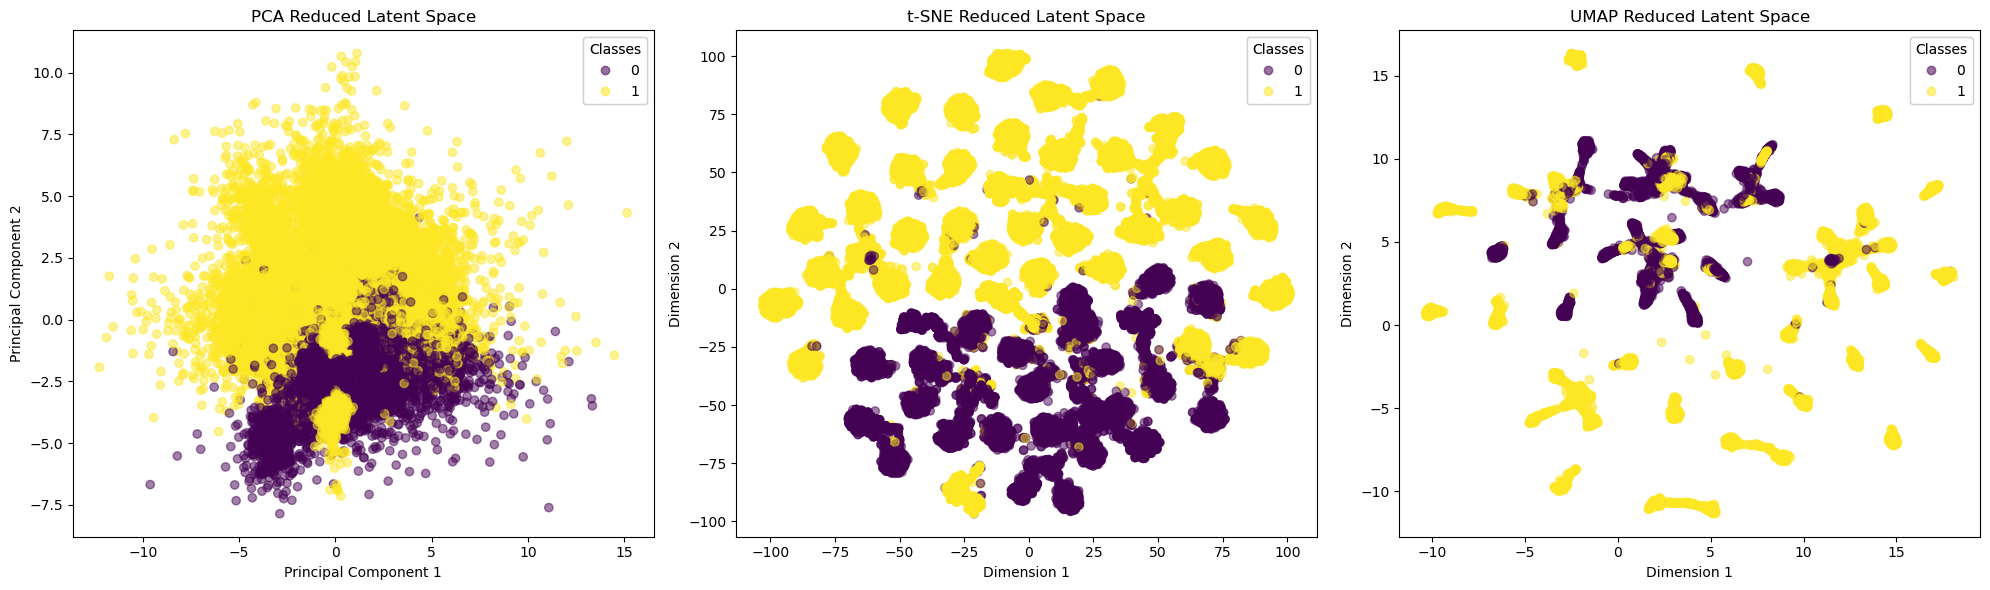

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_latents)
val_pca = pca.transform(val_latents)
scatter = axs[0].scatter(train_pca[:, 0], train_pca[:, 1], c=train_labels, alpha=0.5)
axs[0].scatter(val_pca[:, 0], val_pca[:, 1], c=val_labels, alpha=0.5)
legend1 = axs[0].legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Classes")
axs[0].add_artist(legend1)
axs[0].set_title('PCA Reduced Latent Space')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# t-SNE
tsne = TSNE(n_components=2)
all_latents = np.vstack([train_latents, val_latents])
all_labels = np.hstack([train_labels.reshape(-1), val_labels.reshape(-1)])
all_tsne = tsne.fit_transform(all_latents)
scatter = axs[1].scatter(all_tsne[:len(train_labels), 0], all_tsne[:len(train_labels), 1], c=train_labels, alpha=0.5)
axs[1].scatter(all_tsne[len(train_labels):, 0], all_tsne[len(train_labels):, 1], c=val_labels, alpha=0.5)
legend2 = axs[1].legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Classes")
axs[1].add_artist(legend2)
axs[1].set_title('t-SNE Reduced Latent Space')
axs[1].set_xlabel('Dimension 1')
axs[1].set_ylabel('Dimension 2')

# UMAP
reducer = umap.UMAP()
train_umap = reducer.fit_transform(train_latents)
val_umap = reducer.transform(val_latents)
scatter = axs[2].scatter(train_umap[:, 0], train_umap[:, 1], c=train_labels, alpha=0.5)
axs[2].scatter(val_umap[:, 0], val_umap[:, 1], c=val_labels, alpha=0.5)
legend3 = axs[2].legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Classes")
axs[2].add_artist(legend3)
axs[2].set_title('UMAP Reduced Latent Space')
axs[2].set_xlabel('Dimension 1')
axs[2].set_ylabel('Dimension 2')

# Show the plot
plt.tight_layout()
plt.show()

### PCA on the original 

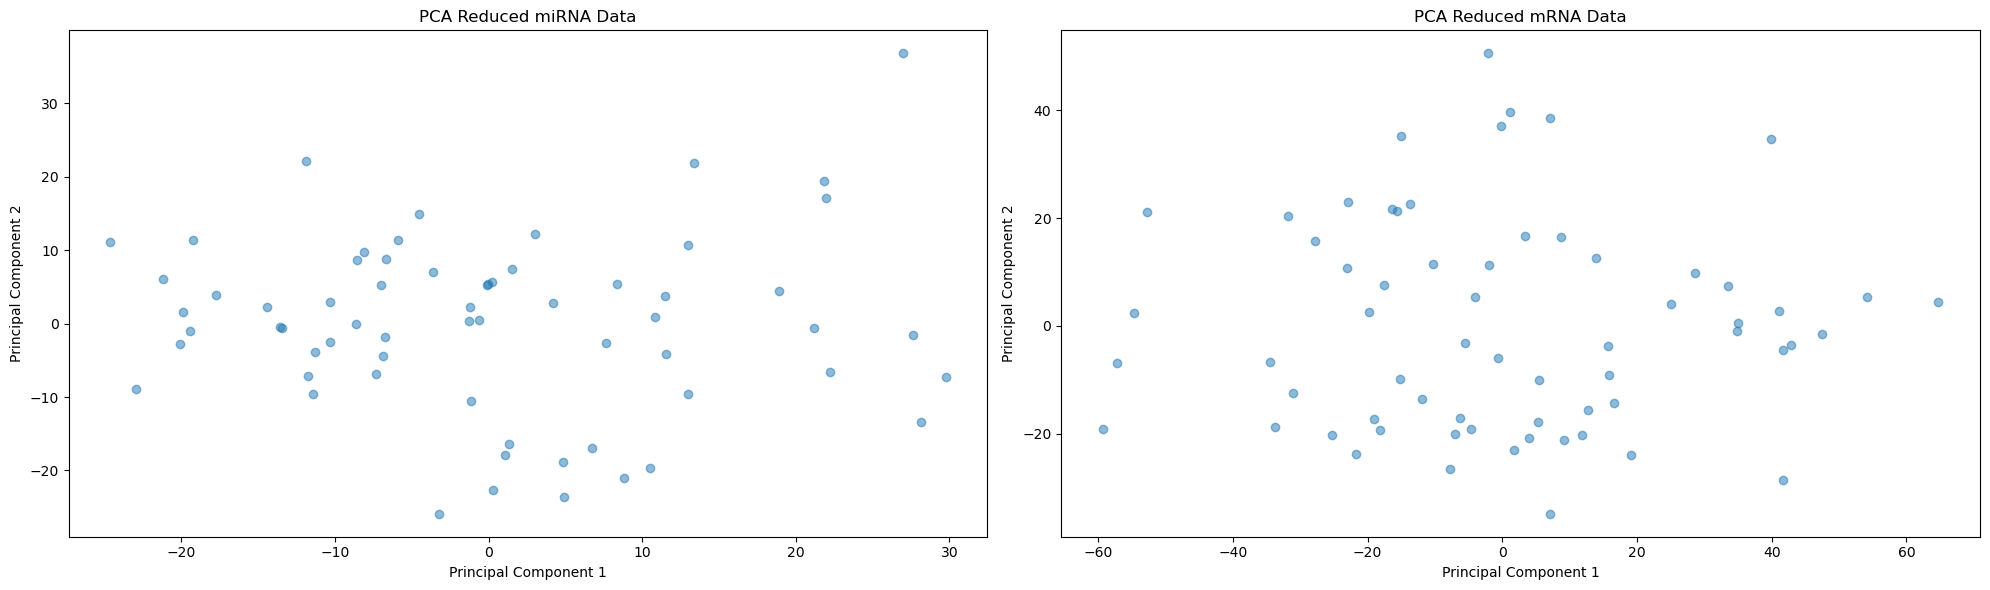

In [25]:
pca = PCA(n_components=2)

# Apply PCA to the miRNA dataset
pca_miRNA = pca.fit_transform(miRNA)

# Apply PCA to the mRNA dataset
pca_mRNA = pca.fit_transform(mRNA)

# Create a figure to hold the subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot the PCA results for miRNA
axs[0].scatter(pca_miRNA[:, 0], pca_miRNA[:, 1], alpha=0.5)
axs[0].set_title('PCA Reduced miRNA Data')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# Plot the PCA results for mRNA
axs[1].scatter(pca_mRNA[:, 0], pca_mRNA[:, 1], alpha=0.5)
axs[1].set_title('PCA Reduced mRNA Data')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

# Show the plot
plt.tight_layout()
plt.show()

### Lasso regression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [16]:
X_train, X_val, y_train, y_val = train_test_split(df_train, patient_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Fit Lasso model
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Reconstruction Error
lasso_recon = lasso.predict(X_train_scaled)
lasso_recon_error = mean_squared_error(y_train, lasso_recon)

# Classification (assuming a threshold of 0.5 to classify)
lasso_class = (lasso.predict(X_val_scaled) > 0.5).astype(int)
lasso_acc = accuracy_score(y_val, lasso_class)
lasso_f1 = f1_score(y_val, lasso_class)

c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:

# Reconstruction Error (assuming you have a function get_reconstruction that gets the reconstruction of X from the VAE)
# Print errors
print(f'VAE Train Reconstruction Error: {train_recon_error}')
print(f'VAE Validation Reconstruction Error: {val_recon_error}')
print(f'Lasso Prediction Error: {lasso_recon_error}')

VAE Train Reconstruction Error: 0.25646601244807243
VAE Validation Reconstruction Error: 0.872931182384491
Lasso Prediction Error: 6.239346348451568e-05


### Joint Feature space